# Human Resources: Employee Retention

In [1]:
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

%matplotlib inline

sns.set(style="whitegrid", color_codes=True)
sns.set_context("paper", font_scale=1.8)

In [2]:
hr_df = pd.read_csv("data/HR.csv")
hr_df.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


In [3]:
hr_df.shape

(14999, 10)

## EDA

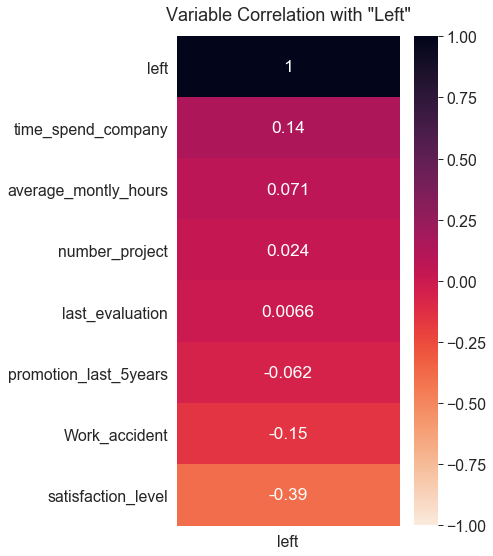

In [4]:
plt.figure(figsize=(5, 9))
heatmap = sns.heatmap(hr_df.corr()[['left']].sort_values(by='left', ascending=False), vmin=-1, vmax=1, annot=True, cmap='rocket_r')
heatmap.set_title('Variable Correlation with "Left"', fontdict={'fontsize':18}, pad=16);

Looking at the Correlation Heatmap it looks as if the top 5 factors for employee retention are:

1) Employee Satisfaction Level

2) Whether or Not the Employee was in a Work Accident

3) Time Employee has Spent with the Company

4) Employees Average Monthly Hours

5) Whether or Not the Employee was Promotted in the Last 5 Years


_______________________________________________________________________________________
I suspect not many employees have had a work accident so I am looking into this further


In [5]:
hr_df['Work_accident'].value_counts()

0    12830
1     2169
Name: Work_accident, dtype: int64

16.9% of employees have has work accidnets, this may be high enough to leave in for my analysis. I will try it with and without.
______________________________________

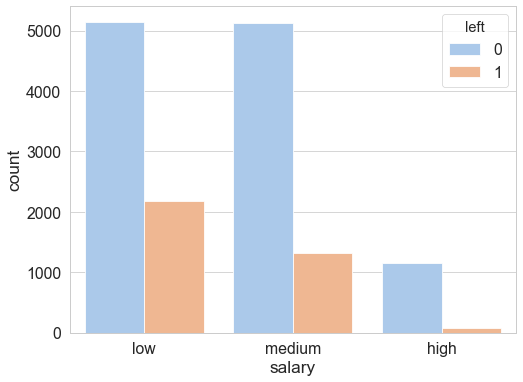

In [6]:
fig, bar_salary = plt.subplots(figsize = (8,6))
bar_salary = sns.countplot(x ='salary', hue = "left", data = hr_df, palette = ("pastel"))

In [7]:
#low salary
hr_df[hr_df['salary'] == 'low'].groupby(["left"])[['salary']].count()

,salary
left,
0,5144
1,2172


In [8]:
#medium salary
hr_df[hr_df['salary'] == 'medium'].groupby(["left"])[['salary']].count()

,salary
left,
0,5129
1,1317


In [9]:
#high salary
hr_df[hr_df['salary'] == 'high'].groupby(["left"])[['salary']].count()

,salary
left,
0,1155
1,82


Percent with low salary that left: 42.2%

Percent with medium salary that left: 25.7%

Percent with high salary that left: 7.1%


Salary has a high impact on whether or not an employee will leave the following year.

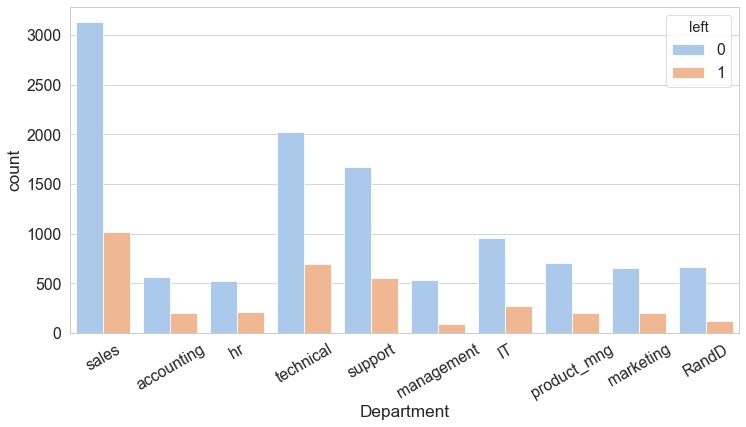

In [10]:
fig, bar_dep = plt.subplots(figsize = (12,6))
bar_dep = sns.countplot(x ='Department', hue = "left", data = hr_df, palette = ("pastel"))

for item in bar_dep.get_xticklabels():
    item.set_rotation(30)

In [11]:
# Checking a few Departments

# Sales Department
hr_df[hr_df['Department'] == 'sales'].groupby(["left"])[['Department']].count()

,Department
left,
0,3126
1,1014


In [12]:
# HR Department
hr_df[hr_df['Department'] == 'hr'].groupby(["left"])[['Department']].count()

,Department
left,
0,524
1,215


In [13]:
# Technical Department
hr_df[hr_df['Department'] == 'technical'].groupby(["left"])[['Department']].count()

,Department
left,
0,2023
1,697


In [14]:
# Support Department
hr_df[hr_df['Department'] == 'support'].groupby(["left"])[['Department']].count()

,Department
left,
0,1674
1,555


Percent in Sales that left: 32.4%

Percent in HR that left: 41%

Percent in Technical that left: 34.5%

Percent in Support that left: 33.2%

These percents are much closer to each other, so I am not going to use department in my analysis.

# Cleaning Data

I am choosing to remove the columns "number_project", "last_evaluation", and "department", because they do not have a strong correlation with whether or not the employee left the company the following year.

The highest accuracy number I got was by including the top 3 higest correlated numerical variables as well as the "salary" categorical variable.

In [59]:
# subsetting for variables I want to use
hr_df_subset = hr_df[['satisfaction_level','Work_accident','time_spend_company','salary']]
hr_df_subset.head()

,satisfaction_level,Work_accident,time_spend_company,salary
0,0.38,0,3,low
1,0.80,0,6,medium
2,0.11,0,4,medium
3,0.72,0,5,low
4,0.37,0,3,low


## Cleaning Categorical Variables

Created dummy variables for the salary column

In [60]:
# making dummy variables for salary
salary_dummies = pd.get_dummies(hr_df_subset.salary, prefix="salary")

In [61]:
# adding dummy variable collmns to the subsetted hr df
hr_df_for_sklearn = pd.concat([hr_df_subset,salary_dummies],axis='columns')

In [62]:
#dropping salary column now that I have dummies
hr_df_for_sklearn = hr_df_for_sklearn.drop('salary', axis = 1)

In [63]:
hr_df_for_sklearn.head()

,satisfaction_level,Work_accident,time_spend_company,salary_high,salary_low,salary_medium
0,0.38,0,3,0,1,0
1,0.80,0,6,0,0,1
2,0.11,0,4,0,0,1
3,0.72,0,5,0,1,0
4,0.37,0,3,0,1,0


## Logistic Regression

In [64]:
# setting df with variables for prediction
X = hr_df_for_sklearn

#list of whether they left or not
y = hr_df.left

In [65]:
# splitting into testing and training
X_train, X_test, y_train, y_test = train_test_split(X,y,train_size=0.7)

In [66]:
# setting up the model for logistic regression
model = LogisticRegression()

In [67]:
# fitting model
model.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [68]:
# predicting my testing set
model.predict(X_test)

array([0, 0, 0, ..., 1, 0, 1], dtype=int64)

In [69]:
# checking 'accuracy score
model.score(X_test,y_test)

0.7697777777777778

## Random Forest

## Conclusion

The ____ worked better with an accuracy score of __________.

I am going to use this to calculate the predicive probability that each employee in my testing set will leave or stay.